In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/nikhilaji/Documents/Pandas_basics/Pandas/Data Jobs.csv')

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [8]:
df_exploded =  df.explode('job_skills')

<Axes: xlabel='job_skills'>

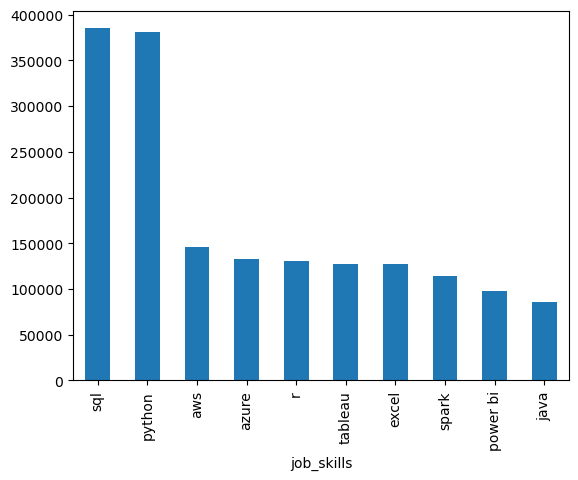

In [13]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [15]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

type(skills_count)

pandas.core.series.Series

In [26]:
df_skills_count = skills_count.reset_index(name = 'skill_count')

df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


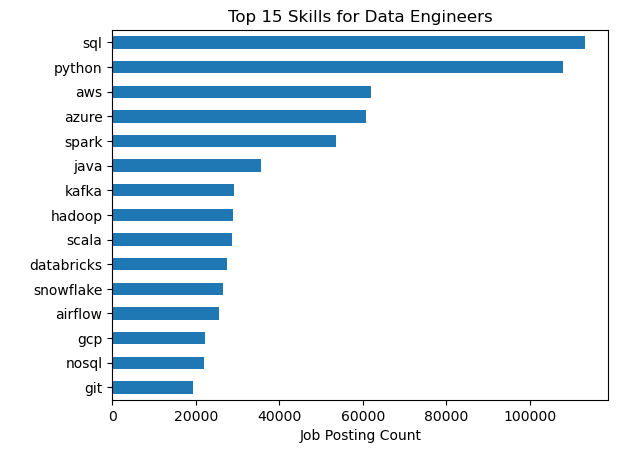

In [35]:
job_title = 'Data Engineer'
top_skills = 15

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')

plt.gca().invert_yaxis()

plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()